<a href="https://colab.research.google.com/github/rogers-dwiputra/Tugas-Besar-SIstem-Cerdas/blob/main/Tubes_Sistem_Cerdas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import random
from time        import process_time 
from itertools   import permutations, combinations
from functools   import lru_cache as cache
from collections import Counter
from statistics  import mean, median

In [12]:
#Definisikan data Cities (random) bagian ini yang harus kita ganti menjadi data pelanggan dari PDAM

alltours = permutations 

def tour_length(tour):
    """The total of distances between each pair of consecutive cities in the tour.
    This includes the last-to-first, distance(tour[-1], tour[0])"""
    return sum(distance(tour[i - 1], tour[i]) 
               for i in range(len(tour)))

City = complex

def distance(A, B): return abs(A - B)

def Cities(n, seed=123, width=999, height=666):
    "Make a set of n cities, sampled uniformly from a (width x height) rectangle."
    random.seed((n, seed))
    return frozenset(City(random.randint(1, width), random.randint(1, height))
                     for c in range(n))

In [20]:
#Definisikan fungsi untuk Plot Tampilan, fungsi ini tidak kita pakai lagi kalau sudah menggunakan data PDAM, kita akan menggunakan tampilan dari Google Maps

def plot_tour(tour, style='bo-'): 
    "Plot every city and link in the tour, and highlight start city."
    if len(tour) > 1000: plt.figure(figsize=(15, 10))
    start = tour[0:1]
    plot_segment(tour + start, style)
    plot_segment(start, 'rD') # start city is red Diamond.

def plot_segment(segment, style='bo-'):
    "Plot every city and link in the segment."
    plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on=False)
    plt.axis('scaled')
    plt.axis('off')

def X(city): "X coordinate."; return city.real
def Y(city): "Y coordinate."; return city.imag

In [13]:
#Function do (bawaan dari contoh kodingan, ini melakukan perhitungan waktu proses, panggil nama algorimanya dan plot tampilan)

def do(algorithm, cities):
    "Apply a TSP algorithm to cities, plot the result, and print info."
    t0   = process_time()
    tour = algorithm(cities)
    t1   = process_time()
    assert Counter(tour) == Counter(cities) # Every city appears exactly once in tour
    plot_tour(tour)
    print("{}: {} cities ⇒ tour length {:.0f} (in {:.3f} sec)".format(
          name(algorithm), len(tour), tour_length(tour), t1 - t0))
    
def name(algorithm): return algorithm.__name__.replace('_tsp', '')

In [14]:
#Function Nearest Neighbor, ini inti dari Tubes kita

def nn_tsp(cities, start=None):
    """Start the tour at the given start city (default: first city); 
    at each step extend the tour by moving from the previous city 
    to its nearest neighbor that has not yet been visited."""
    C = start or first(cities)
    tour = [C]
    unvisited = set(cities - {C})
    while unvisited:
        C = nearest_neighbor(C, unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def first(collection): return next(iter(collection))

def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda C: distance(C, A))

nn: 10 cities ⇒ tour length 2792 (in 0.000 sec)


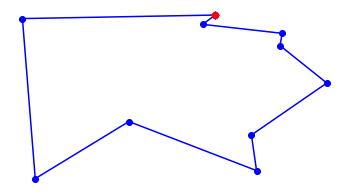

In [21]:
#Panggil Functionnya disini

do(nn_tsp, Cities(10))